In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold,cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [14]:
traindf = pd.read_csv('/content/trainKNN.txt')

In [15]:
traindf.columns = ['id','refractiveindex','sodium','magnesium','aluminum','silicon','potassium','calcium','barium','iron','types of glass']

In [81]:
testdf = pd.read_csv('/content/testKNN.txt')


In [85]:
testdf.columns = ['id','refractiveindex','sodium','magnesium','aluminum','silicon','potassium','calcium','barium','iron','types of glass']

In [23]:
testdf

,id,refractiveindex,sodium,magnesium,aluminum,silicon,potassium,calcium,barium,iron,types of glass
0,69,1.52152,13.12,3.58,0.90,72.20,0.23,9.82,0.00,0.16,1
1,70,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.00,0.03,1
2,144,1.51709,13.00,3.47,1.79,72.72,0.66,8.18,0.00,0.00,2
3,145,1.51660,12.99,3.18,1.23,72.97,0.58,8.81,0.00,0.24,2
4,146,1.51839,12.85,3.67,1.24,72.57,0.62,8.68,0.00,0.35,2
5,161,1.51832,13.33,3.34,1.54,72.14,0.56,8.99,0.00,0.00,3
6,162,1.51934,13.64,3.54,0.75,72.65,0.16,8.89,0.15,0.24,3
7,163,1.52211,14.19,3.78,0.91,71.36,0.23,9.14,0.00,0.37,3
8,174,1.52043,13.38,0.00,1.40,72.25,0.33,12.50,0.00,0.00,5
9,175,1.52058,12.85,1.61,2.17,72.18,0.76,9.70,0.24,0.51,5


In [24]:
traindf.columns

Index(['id', 'refractiveindex', 'sodium', 'magnesium', 'aluminum', 'silicon',
       'potassium', 'calcium', 'barium', 'iron', 'types of glass'],
      dtype='object')

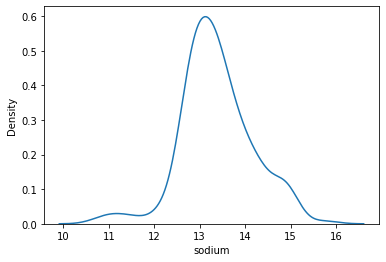

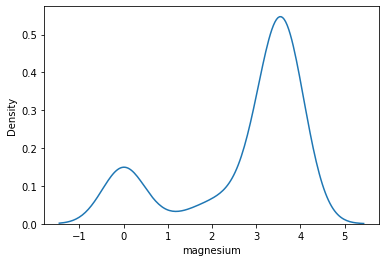

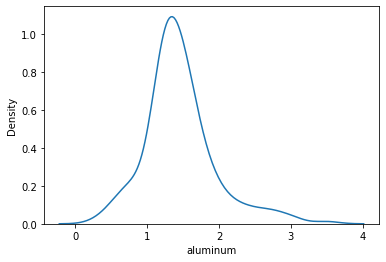

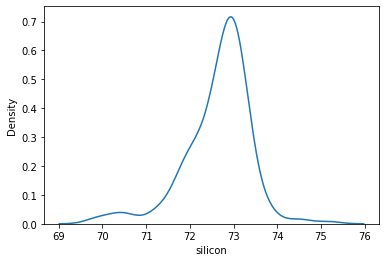

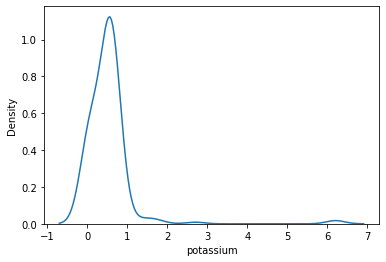

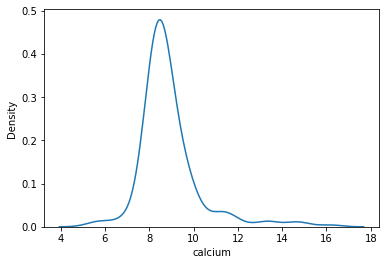

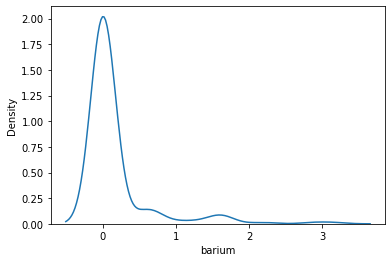

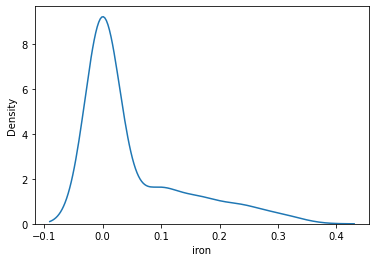

In [27]:
for i in ['sodium', 'magnesium', 'aluminum', 'silicon',
       'potassium', 'calcium', 'barium', 'iron']:
       sns.kdeplot(traindf[i])
       plt.show()

In [61]:
x = traindf[['sodium', 'magnesium', 'aluminum', 'silicon','potassium', 'calcium','barium', 'iron']]
y = traindf['types of glass']
# 

In [62]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.33,random_state = 10)

In [63]:
scaler = MinMaxScaler()
tx_train = scaler.fit_transform(x_train)
tx_test = scaler.transform(x_test)

In [64]:
score = []
for i in range(1,40):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(tx_train,y_train)
  score.append(knn.score(tx_test,y_test))

Text(0, 0.5, 'accuracy')

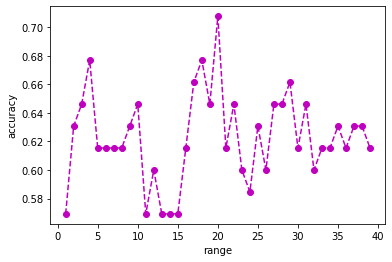

In [65]:
plt.plot(range(1,40),score,'o--m')
plt.xlabel('range')
plt.ylabel('accuracy')


### k= 20 is optimum 

In [72]:
knn  =    KNeighborsClassifier(n_neighbors=20)
knn.fit(tx_train,y_train)
pred = knn.predict(tx_test)

In [73]:
confusion_matrix(y_test,pred)

array([[20,  4,  0,  0,  0,  0],
       [ 5, 20,  0,  0,  0,  1],
       [ 3,  1,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  1],
       [ 2,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  6]])

In [74]:
accuracy_score(y_test,pred)

0.7076923076923077

### Testing 

In [87]:
yt = testdf['types of glass']
yt

0     1
1     1
2     2
3     2
4     2
5     3
6     3
7     3
8     5
9     5
10    5
11    6
12    6
13    6
14    7
15    7
16    7
Name: types of glass, dtype: int64

In [78]:
xt = testdf[['sodium','magnesium','aluminum','silicon','potassium','calcium','barium','iron']]

In [79]:
xt

,sodium,magnesium,aluminum,silicon,potassium,calcium,barium,iron
0,13.12,3.58,0.90,72.20,0.23,9.82,0.00,0.16
1,13.31,3.58,0.82,71.99,0.12,10.17,0.00,0.03
2,13.00,3.47,1.79,72.72,0.66,8.18,0.00,0.00
3,12.99,3.18,1.23,72.97,0.58,8.81,0.00,0.24
4,12.85,3.67,1.24,72.57,0.62,8.68,0.00,0.35
5,13.33,3.34,1.54,72.14,0.56,8.99,0.00,0.00
6,13.64,3.54,0.75,72.65,0.16,8.89,0.15,0.24
7,14.19,3.78,0.91,71.36,0.23,9.14,0.00,0.37
8,13.38,0.00,1.40,72.25,0.33,12.50,0.00,0.00
9,12.85,1.61,2.17,72.18,0.76,9.70,0.24,0.51


In [91]:
txt = scaler.transform(xt)
predt = knn.predict(txt)

In [92]:
confusion_matrix(yt,predt)

array([[1, 1, 0, 0, 0, 0],
       [0, 3, 0, 0, 0, 0],
       [0, 3, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 3],
       [0, 0, 0, 0, 0, 3]])

In [94]:
accuracy_score(yt,predt)

0.4117647058823529